In [1]:
import h5py
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import matplotlib.cm as cm
from scipy.signal import savgol_filter
from scipy import stats

batch1 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

numBat1 = len(batch1.keys())

batch2 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch2.pkl','rb'))
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

numBat2 = len(batch2.keys())

batch3 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c38']
del batch3['b3c39']

numBat3 = len(batch3.keys())
numBat = numBat1 + numBat2 + numBat3
bat_dict = {**batch1, **batch2, **batch3}

In [10]:
#1. Minimum feature
# train prim_test secondary_test
bat1_2 = {**batch1, **batch2}

prim_test_min=[]
prim_test_cycle=[]
Train_min=[]
Train_cycle=[]
secondary_cycle=[]
secondary_min=[]

for i,j in enumerate(bat1_2.keys()):
    a=len(bat1_2.keys())
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=diff=Qdlin100-Qdlin10
    mi,cycle=np.min(diff),bat_dict[j]['cycle_life'].tolist()
    if i==83:
        prim_test_min.append(mi)
        prim_test_cycle.append(cycle)
        break
    if i%2==0:
        prim_test_min.append(mi)
        prim_test_cycle.append(cycle)
    if i%2==1:
        Train_min.append(mi)
        Train_cycle.append(cycle)

for i,j in enumerate(batch3.keys()):
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=Qdlin100-Qdlin10
    mi,cycle=np.min(diff),bat_dict[j]['cycle_life'].tolist()
    secondary_min.append(mi)
    secondary_cycle.append(cycle)

In [11]:
#2. Variance
# train prim_test secondary_test
prim_test_var=[]
Train_var=[]
secondary_var=[]
for i,j in enumerate(bat1_2.keys()):
    a=len(bat1_2.keys())
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=diff=Qdlin100-Qdlin10
    var=np.var(diff)
    if i==83:
        prim_test_var.append(var)
        break
    if i%2==0:
        prim_test_var.append(var)
    if i%2==1:
        Train_var.append(var)
for i,j in enumerate(batch3.keys()):
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=Qdlin100-Qdlin10
    var=np.var(diff)
    secondary_var.append(var)

In [12]:
#3. Skewness
# train prim_test secondary_test
from scipy.stats import skew
prim_test_skew=[]
Train_skew=[]
secondary_skew=[]
for i,j in enumerate(bat1_2.keys()):
    a=len(bat1_2.keys())
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=diff=Qdlin100-Qdlin10
    sk=skew(diff)
    if i==83:
        prim_test_skew.append(sk)
        break
    if i%2==0:
        prim_test_skew.append(sk)
    if i%2==1:
        Train_skew.append(sk)
for i,j in enumerate(batch3.keys()):
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=Qdlin100-Qdlin10
    sk=skew(diff)
    secondary_skew.append(sk)

In [13]:
#4. Kutosis
# train prim_test secondary_test
from scipy.stats import kurtosis
prim_test_kurt=[]
Train_kurt=[]
secondary_kurt=[]
for i,j in enumerate(bat1_2.keys()):
    a=len(bat1_2.keys())
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=diff=Qdlin100-Qdlin10
    kurt=kurtosis(diff,fisher=True)
    if i==83:
        prim_test_kurt.append(kurt)
        break
    if i%2==0:
        prim_test_kurt.append(kurt)
    if i%2==1:
        Train_kurt.append(kurt)
for i,j in enumerate(batch3.keys()):
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=Qdlin100-Qdlin10
    kurt=kurtosis(diff,fisher=True)
    secondary_kurt.append(kurt)

In [14]:
#5. Discharge Capacity, Cycle2
# train prim_test secondary_test
prim_test_Cycle2=[]
Train_Cycle2=[]
secondary_Cycle2=[]
for i,j in enumerate(bat1_2.keys()):
    a=len(bat1_2.keys())
    Cycle2=np.max(bat_dict[j]['cycles']['1']['Qdlin'])
    if i==83:
        prim_test_Cycle2.append(Cycle2)
        break
    if i%2==0:
        prim_test_Cycle2.append(Cycle2)
    if i%2==1:
        Train_Cycle2.append(Cycle2)
for i,j in enumerate(batch3.keys()):
    Cycle2=np.max(bat_dict[j]['cycles']['1']['Qdlin'])
    secondary_Cycle2.append(Cycle2)

In [15]:
#6. Difference between max discharge capacity and cycle 2
# train prim_test secondary_test
prim_test_max_Q=[]
Train_max_Q=[]
secondary_max_Q=[]
for i,j in enumerate(bat1_2.keys()):
    a=len(bat1_2.keys())
    max_Q=[]
    for k in range(100):
        max_q=np.max(bat_dict[j]['cycles']['{}'.format(k)]['Qdlin'])
        max_Q.append(max_q)
    max_Q=np.array(max_Q)
    max_Q=np.max(max_Q)
    if i==83:
        prim_test_max_Q.append(max_Q)
        break
    if i%2==0:
        prim_test_max_Q.append(max_Q)
    if i%2==1:
        Train_max_Q.append(max_Q)
for i,j in enumerate(batch3.keys()):
    max_Q=[]
    for k in range(100):
        max_q=np.max(bat_dict[j]['cycles']['{}'.format(k)]['Qdlin'])
        max_Q.append(max_q)
    max_Q=np.array(max_Q)
    max_Q=np.max(max_Q)
    secondary_max_Q.append(max_Q)

In [16]:
prim_test_min2=np.log10(np.abs(np.array(prim_test_min))).reshape(-1,1)
prim_test_cycle2=np.array(prim_test_cycle).reshape(-1,1)
Train_min1=np.log10(np.abs(np.array(Train_min))).reshape(-1,1)
Train_cycle1=np.array(Train_cycle).reshape(-1,1)
secondary_cycle3=np.array(secondary_cycle).reshape(-1,1)
secondary_min3=np.log10(np.abs(np.array(secondary_min))).reshape(-1,1)

prim_test_var2=np.log10(np.abs(np.array(prim_test_var))).reshape(-1,1)
Train_var1=np.log10(np.abs(np.array(Train_var))).reshape(-1,1)
secondary_var3=np.log10(np.abs(np.array(secondary_var))).reshape(-1,1)

prim_test_skew2=np.log10(np.abs(np.array(prim_test_skew))).reshape(-1,1)
Train_skew1=np.log10(np.abs(np.array(Train_skew))).reshape(-1,1)
secondary_skew3=np.log10(np.abs(np.array(secondary_skew))).reshape(-1,1)

prim_test_kurt2=np.log10(np.abs(np.array(prim_test_kurt))).reshape(-1,1)
Train_kurt1=np.log10(np.abs(np.array(Train_kurt))).reshape(-1,1)
secondary_kurt3=np.log10(np.abs(np.array(secondary_kurt))).reshape(-1,1)

prim_test_Cycle22=np.array(prim_test_Cycle2).reshape(-1,1)
Train_Cycle21=np.array(Train_Cycle2).reshape(-1,1)
secondary_Cycle23=np.array(secondary_Cycle2).reshape(-1,1)

prim_test_max_Q2=np.array(prim_test_max_Q).reshape(-1,1)
Train_max_Q1=np.array(Train_max_Q).reshape(-1,1)
secondary_max_Q3=np.array(secondary_max_Q).reshape(-1,1)

In [17]:
#min,var,skew,kurt,cycle2,max-cycle2, 정답cycle
Train_dataset=np.hstack([Train_min1,Train_var1,Train_skew1,Train_kurt1,Train_Cycle21,Train_max_Q1])
label_dataset=Train_cycle1
Train_dataset.shape, label_dataset.shape

((41, 6), (41, 1))

In [18]:
#elasticnet
from sklearn.linear_model import ElasticNetCV
regr=ElasticNetCV(cv=4)
Train=Train_dataset
label=np.log10(label_dataset).reshape(-1)
regr.fit(Train,label)

ElasticNetCV(cv=4)

In [19]:
print(regr.alpha_)
print(regr.coef_)
print(regr.intercept_)

0.0026831540417136587
[-0.         -0.36174577  0.03242205 -0.          0.          0.00173852]
1.494532354275695


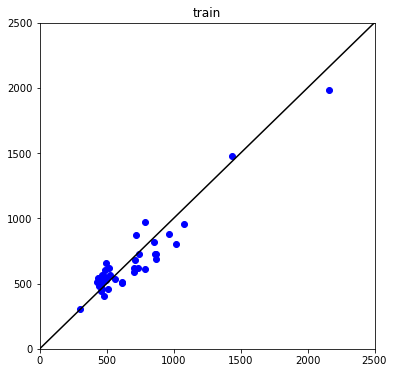

In [20]:
x=[0,2500];y=[0,2500]
plt.figure(figsize=(6,6))
plt.plot(x,y,c='black')
pred=regr.predict(Train)
plt.scatter(10**label,10**pred,color='blue',marker='o')
plt.title('train')
plt.axis([0,2500,0,2500])
plt.show()

In [21]:
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
from sklearn.metrics import mean_squared_error
rmse1=np.sqrt(mean_squared_error(10**label,10**pred))
print('train RMSE, Mean Absolute Percentage Error')
rmse1,MAPE(10**label,10**pred)

train RMSE, Mean Absolute Percentage Error


(103.07949098006692, 13.328542756339981)

In [22]:
#min,var,skew,kurt,cycle2,max-cycle2, 정답cycle
Train_dataset2=np.hstack([prim_test_min2,prim_test_var2,prim_test_skew2,prim_test_kurt2,prim_test_Cycle22,prim_test_max_Q2])
label_dataset2=prim_test_cycle2
Train_dataset2.shape, label_dataset2.shape

((43, 6), (43, 1))

In [23]:
Train2=Train_dataset2
label2=np.log10(label_dataset2).reshape(-1)
pred2=regr.predict(Train2)

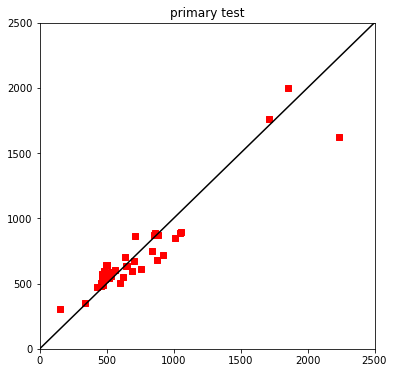

In [24]:
x=[0,2500];y=[0,2500]
plt.figure(figsize=(6,6))
plt.plot(x,y,c='black')
plt.scatter(10**label2,10**pred2,color='red',marker='s')
plt.title('primary test')
plt.axis([0,2500,0,2500])
plt.show()

In [25]:
rmse2=np.sqrt(mean_squared_error(10**label2,10**pred2))
print('primary test RMSE, Mean Absolute Percentage Error')
rmse2,MAPE(10**label2,10**pred2)

primary test RMSE, Mean Absolute Percentage Error


(135.37527573145871, 14.710237661471234)

In [27]:
#secondary
#min,var,skew,kurt,cycle2,max-cycle2, 정답cycle
Train_dataset3=np.hstack([secondary_min3,secondary_var3,secondary_skew3,secondary_kurt3,secondary_Cycle23,secondary_max_Q3])
label_dataset3=secondary_cycle3
Train_dataset3.shape, label_dataset3.shape

((40, 6), (40, 1))

In [28]:
Train3=Train_dataset3
label3=np.log10(label_dataset3).reshape(-1)
pred3=regr.predict(Train3)

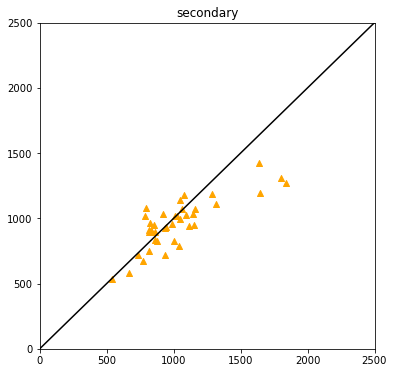

In [29]:
x=[0,2500];y=[0,2500]
plt.figure(figsize=(6,6))
plt.plot(x,y,c='black')
plt.scatter(10**label3,10**pred3,color='orange',marker='^')
plt.title('secondary')
plt.axis([0,2500,0,2500])
plt.show()

In [30]:
rmse3=np.sqrt(mean_squared_error(10**label3,10**pred3))
print('secondary test RMSE, Mean Absolute Percentage Error')
rmse3,MAPE(10**label3,10**pred3)

secondary test RMSE, Mean Absolute Percentage Error


(183.59642704628658, 11.774028274716638)

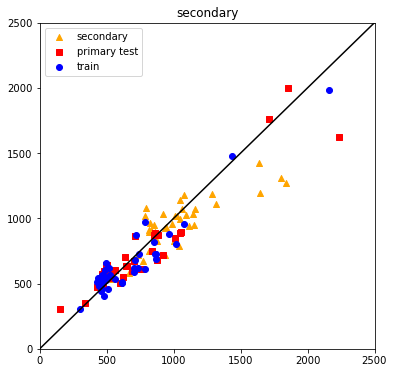

In [31]:
x=[0,2500];y=[0,2500]
plt.figure(figsize=(6,6))
plt.plot(x,y,c='black')
plt.scatter(10**label3,10**pred3,color='orange',marker='^',label='secondary')
plt.scatter(10**label2,10**pred2,color='red',marker='s',label='primary test')
plt.scatter(10**label,10**pred,color='blue',marker='o',label='train')
plt.title('secondary')
plt.axis([0,2500,0,2500])
plt.legend()
plt.show()

In [32]:
s_res=(10**pred3)-(10**label3)
p_res=(10**pred2)-(10**label2)
print(p_res.shape,s_res.shape)

s_res=s_res.reshape(-1,1)
p_res=p_res.reshape(-1,1)
his=np.vstack([p_res,s_res])
print(his,his.shape)

(43,) (40,)
[[ 150.61721523]
 [-611.19215493]
 [  54.81448319]
 [  67.2936066 ]
 [-156.78033619]
 [  -4.56712902]
 [  28.89577011]
 [ -95.12594694]
 [  23.9102346 ]
 [-161.36973664]
 [  14.93920637]
 [ -95.56060222]
 [-197.6391968 ]
 [-196.77997792]
 [-148.26052073]
 [ -30.21032937]
 [  -9.57747158]
 [ -78.40690045]
 [-162.5540947 ]
 [ -15.79902075]
 [ -91.94908928]
 [ 155.25261965]
 [  14.91862086]
 [ 100.68824241]
 [  45.52800989]
 [  23.60540619]
 [  53.66323258]
 [  62.52981078]
 [ 140.21848638]
 [  37.71199874]
 [ 144.28034115]
 [  21.50952527]
 [  43.07453792]
 [ 118.32648771]
 [  25.16733837]
 [ 142.14608239]
 [  53.9049231 ]
 [  72.5620884 ]
 [  44.88534716]
 [ 106.69347022]
 [  44.49873551]
 [  45.23624552]
 [ 152.41092738]
 [  11.96319991]
 [   6.13609518]
 [-170.55180467]
 [ -56.65914837]
 [  82.2614827 ]
 [ -89.5395034 ]
 [-562.51781489]
 [  73.3948315 ]
 [-251.36571652]
 [ 103.35400198]
 [ -68.73876232]
 [-211.23001083]
 [  92.77304309]
 [ -26.22411582]
 [ -49.51126415]
 [

(0.0, 25.0)

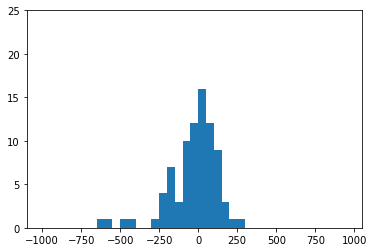

In [33]:
bins=np.arange(-1000,1000,50)# width 조절
plt.hist(his,bins)
plt.ylim(0,25)

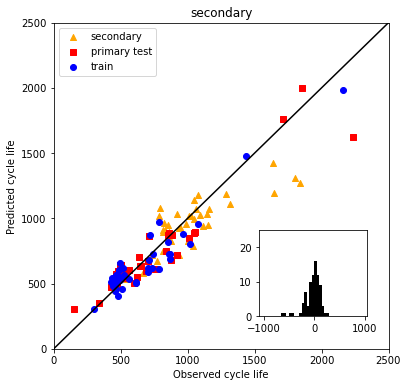

In [34]:
x=[0,2500];y=[0,2500]
plt.figure(figsize=(6,6))
plt.plot(x,y,c='black')
plt.scatter(10**label3,10**pred3,color='orange',marker='^',label='secondary')
plt.scatter(10**label2,10**pred2,color='red',marker='s',label='primary test')
plt.scatter(10**label,10**pred,color='blue',marker='o',label='train')
plt.title('secondary')
plt.xlabel('Observed cycle life')
plt.ylabel('Predicted cycle life')
plt.axis([0,2500,0,2500])
plt.legend()
ax_sub=plt.axes([0.6,0.2,0.25,0.2])
plt.ylim(0,25)
ax_sub.hist(his,bins,color='black')
plt.show()